# Generate Toy Data

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import random
n_samples = 750
n_features = 2
dims = 41
# centers = [[10]*dims, [-5]*dims, [7]*dims, [30]*dims, [-11]*dims]
cstd=0.8

centers = list()
for i in range(0,10):
    centers.append([random.randint(-50,50) for x in range(dims)])

X, labels_true = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, cluster_std=cstd)
# X = StandardScaler().fit_transform(X)

# Reduce Dimension

In [4]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Plt Data w/ True Labels

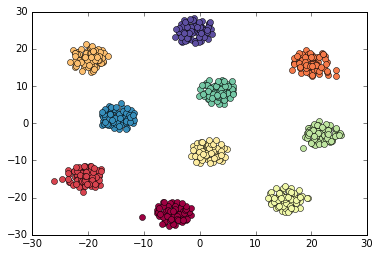

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt



# pca = PCA(n_components=2)
# pca.fit(X)
# z = pca.transform(X) 


# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')[0:1000]

labels = labels_true
core_samples_mask = np.zeros_like(labels_true, dtype=bool)
core_sample_indices = np.arange(n_samples)
core_samples_mask[core_sample_indices] = True
# labels = db.labels_



# # Black removed and is used for noise instead.
unique_labels = set(labels_true)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# plt.title('Estimated number of clusters: %d' % n_clusters_)
# plt.xlim([-15,15])
# plt.ylim([-15,15])
plt.show()

# Perform DBSCAN and Plot Data w/ DBSCAN labels

CPU times: user 54.9 ms, sys: 3.08 ms, total: 58 ms
Wall time: 56.7 ms


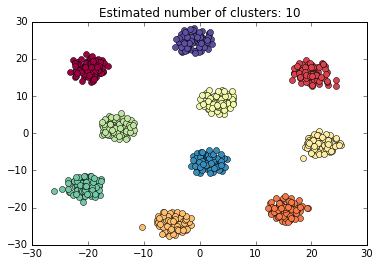

In [6]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Compute DBSCAN
%time db = DBSCAN(eps=10, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


# Reduce dimensions
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

##############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Using Annoy

In [7]:
from annoy import AnnoyIndex
from sklearn.cluster import DBSCAN
t = None
t = AnnoyIndex(dims)
for i in xrange(0,len(X)):
    t.add_item(i, X[i])

t.build(15)
n_neighbors = 75

tempnns = [np.array(t.get_nns_by_item(i, n_neighbors), dtype=np.int64) for i in xrange(0,len(X))]
tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)

model = {'neighborhoods':neighborhoods}

print "Done\nClustering"
%time db = DBSCAN(eps=0.0001, min_samples=20, algorithm="LSHF", lshModel=model).fit(X)
print "Finished"
print "unique labels: {}".format(set(db.labels_))

Done
Clustering
CPU times: user 3.26 ms, sys: 906 µs, total: 4.17 ms
Wall time: 4.06 ms
Finished
unique labels: set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


# DBSCAN with Annoy

/Users/lsxliron/.virtualenvs/bigdata/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


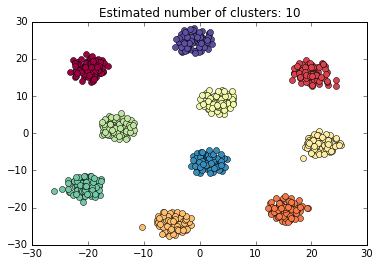

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Reduce dimensions
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)




# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Real Data

In [1]:
import numpy as np
from annoy import AnnoyIndex
from sklearn.cluster import DBSCAN
import bcolz as bc
X = bc.open('/Users/lsxliron/Desktop/Fortran_INP-FLUX/y2006R','r')[0:1000]
# X = np.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005.npy')
dims=41
t = None
t = AnnoyIndex(dims)
print("Adding Vectors")
# for i in range(0,len(X)):
#     if i%10000 == 0:
#         print i
#     t.add_item(i, X[i])
# print i

# print("Building trees")
# t.build(25)
# print("Done building")
t.load('/Users/lsxliron/Desktop/Untitled Folder/2006AnnoyFull.ann')

# t.load('/Users/lsxliron/Desktop/Fortran_INP-FLUX/Jan2005Full.ann')
n_neighbors = 200
r=0.5
# OPTIMIZED
print("Performing Queries")
%time tempnns = [np.array([j[0] for j in zip(*(t.get_nns_by_item(i,n_neighbors,include_distances=True))) if j[1]<r],dtype=np.int64) for i in range(0,len(X))]
# tempnns=list()
# for i in range(0,len(X)):
#     ind, dist = t.get_nns_by_item(i, n_neighbors, include_distances=True)
#     temp = [ind[i] for i in xrange(len(ind)) if dist[i]<r]
#     tempnns.append(np.array(temp, dtype=np.int64))
    

tempnns[len(tempnns)-1] = tempnns[len(tempnns)-1][:-1]
neighborhoods = np.array(tempnns, dtype=object)

model = {'neighborhoods':neighborhoods}

print("Done\nClustering")
%time db = DBSCAN(eps=r, min_samples=3, algorithm="LSHF", lshModel=model).fit(X)
print("Finished")
unique = set(db.labels_)
print("unique labels: {}".format(unique))

for item in unique:
    print("Cluster {} has {} members".format(item, db.labels_.tolist().count(item)))

Adding Vectors
Performing Queries
CPU times: user 686 ms, sys: 36.1 ms, total: 722 ms
Wall time: 751 ms
Done
Clustering
CPU times: user 4.3 ms, sys: 2.29 ms, total: 6.59 ms
Wall time: 6.64 ms
Finished
unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58}
Cluster 0 has 37 members
Cluster 1 has 1 members
Cluster 2 has 1 members
Cluster 3 has 14 members
Cluster 4 has 22 members
Cluster 5 has 14 members
Cluster 6 has 26 members
Cluster 7 has 745 members
Cluster 8 has 12 members
Cluster 9 has 3 members
Cluster 10 has 1 members
Cluster 11 has 8 members
Cluster 12 has 17 members
Cluster 13 has 1 members
Cluster 14 has 1 members
Cluster 15 has 1 members
Cluster 16 has 1 members
Cluster 17 has 1 members
Cluster 18 has 2 members
Cluster 19 has 2 members
Cluster 20 has 2 members
Cluster 21 has 1 members
Cluster 

# Plot Real Data

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
fig = plt.figure(figsize=(12, 12), dpi=100)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Reduce dimensions
print("Reducing...")
model = TSNE(n_components=2, random_state=0)
z = model.fit_transform(X)
# try:
#     filename = "Jan2005TSNE10KG20R0-05.npy"
#     np.save(filename, z)
# except:
#     pass
print("Done Reduction\nPlotting")

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)




# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Statistical Plotting

In [17]:
import numpy as np
from math import ceil
# np.load('Jan2005TSNE10KG20R0-05.npy')
totalPoints = 1000.#float(len(X))#50000.0
unique_labels = set(db.labels_)
orig_clusters = list()
for lb in unique_labels:
    orig_clusters.append(ceil(db.labels_.tolist().count(lb)/totalPoints))

totalPointInGraph = [int(x*1000) for x in orig_clusters]
pointsIndexesToPlot = list()
pointsLabelsToPlot = list()
for i,c in zip(range(len(unique_labels)), unique_labels):
    cluster_indexes = np.where(db.labels_ == c)[0]
    points = np.random.choice(cluster_indexes, size=totalPointInGraph[i])
    pointsIndexesToPlot.extend(points)
    pointsLabelsToPlot.extend([c]*totalPointInGraph[i])


finalPointsToPlot = np.array([X[i] for i in pointsIndexesToPlot])

Reducing...


//anaconda/envs/bigd/lib/python3.5/site-packages/matplotlib/lines.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markerfacecolor != fc:


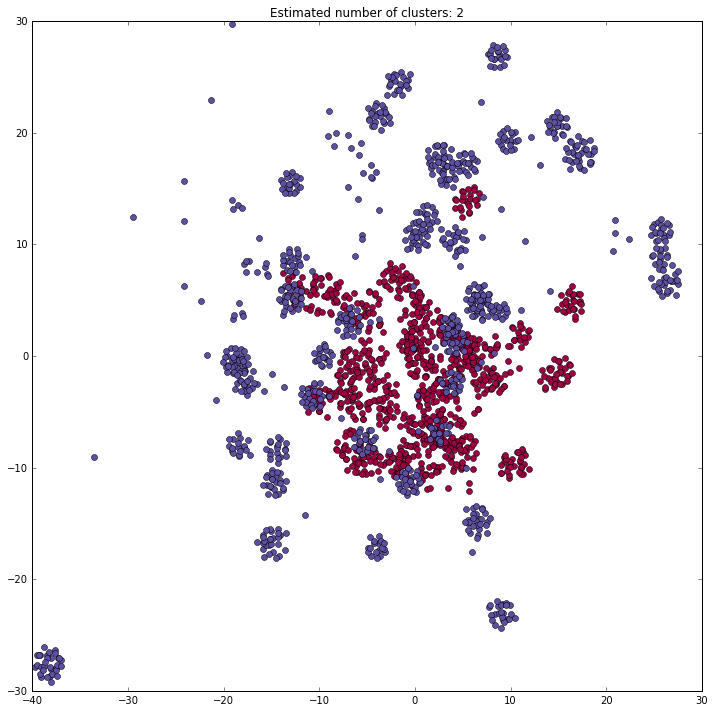

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

fig = plt.figure(figsize=(12, 12), dpi=100)

core_samples_mask = np.zeros_like(pointsLabelsToPlot, dtype=bool)
core_samples_mask[np.arange(len(finalPointsToPlot))] = True
labels = pointsLabelsToPlot

print("Reducing...")
model = TSNE(n_components=3, random_state=0)
%time z = model.fit_transform(finalPointsToPlot)



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# z=finalPointsToPlot



# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1],'.', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# 3D Plotting

<IPython.core.display.Javascript object>


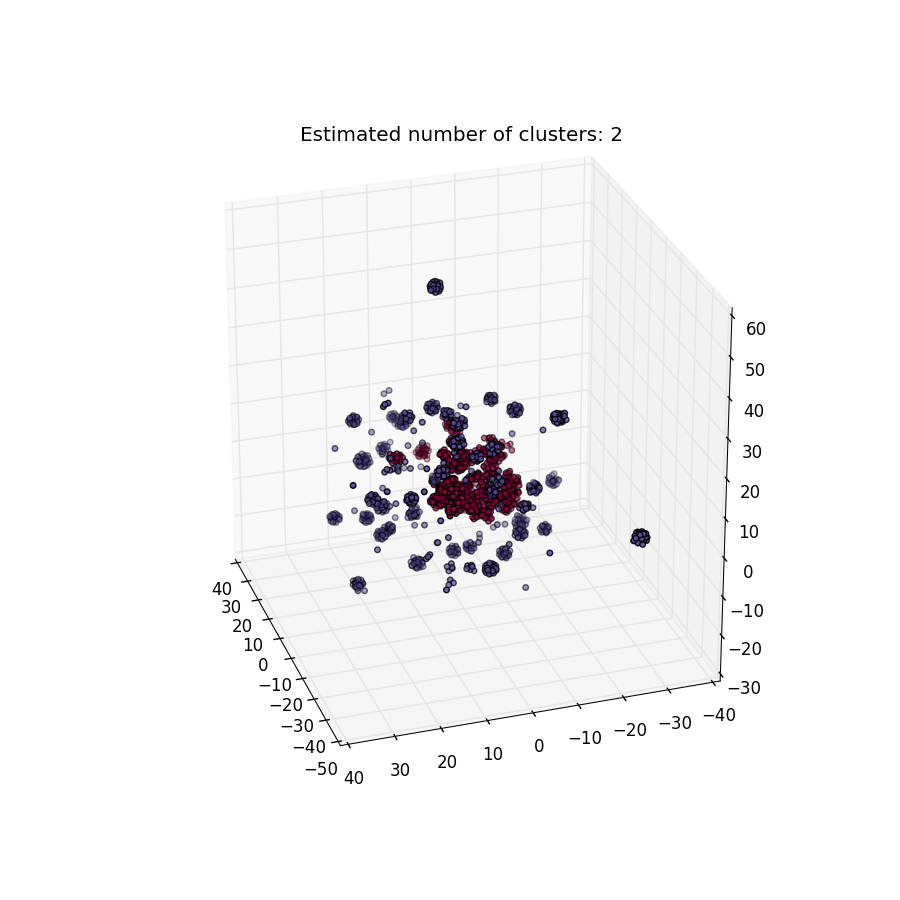

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 9), dpi=100)
ax = fig.add_subplot(111, projection='3d')

core_samples_mask = np.zeros_like(pointsLabelsToPlot, dtype=bool)
core_samples_mask[np.arange(len(finalPointsToPlot))] = True
labels = pointsLabelsToPlot

# print "Reducing..."
# model = TSNE(n_components=3, random_state=0)
# z = model.fit_transform(finalPointsToPlot)



# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# z=finalPointsToPlot



# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2],'o', c=col, s=16)

    xy = z[class_member_mask & ~core_samples_mask]
    ax.scatter(xy[:, 0], xy[:, 1], xy[:, 2], '.', c=col,s=16)

plt.title('Estimated number of clusters: %d' % n_clusters_)
ax.view_init(azim=30)
plt.show()

# PlotLY Test

In [31]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

py.sign_in('lsxliron', 'cutjnhz00h')

xy = z[class_member_mask & core_samples_mask]

trace1 = go.Scatter3d(
    x=xy[:,0],
    y=xy[:,1],
    z=xy[:,2],
    mode='markers',
    marker=dict(size=6, color=db.labels_, colorscale='Viridis', opacity=0.8)
)

data = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        b=0,
        r=0,
        t=0
    )
)

figg = go.Figure(data=data, layout=layout)
py.iplot(figg, filename='3d-scatter-colorscale')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lsxliron/0 or inside your plot.ly account where it is named '3d-scatter-colorscale'
